Importing Dependencies

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
# first 5 rows of the dataframe
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# find number of rows and columnds
insurance_dataset.shape

(1338, 7)

In [6]:
# getting general information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features: 
- Sex
- Smoker
- Region

In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [8]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

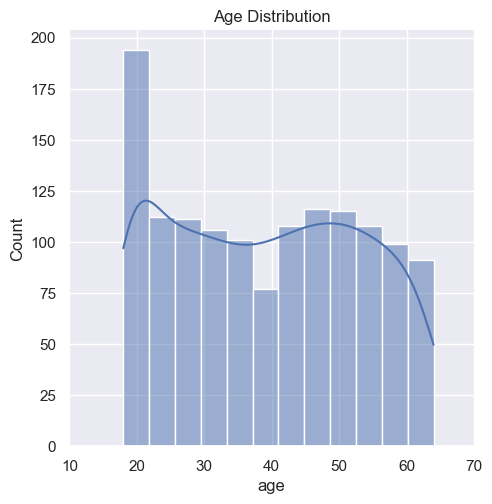

In [39]:
# distribution of age value
sns.set_theme()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.xticks(range(10, int(insurance_dataset['age'].max()) + 10, 10))
plt.show()


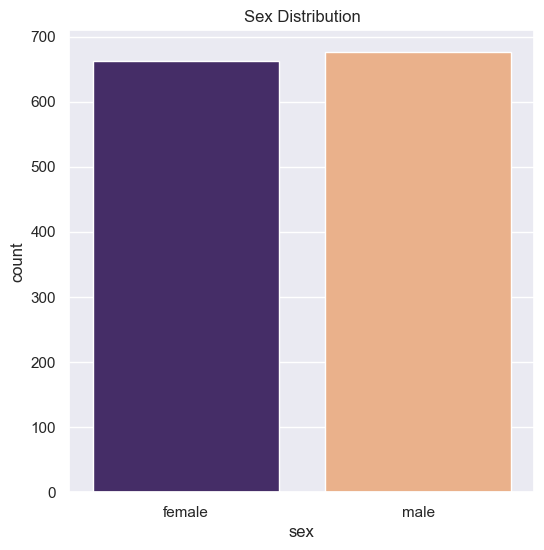

In [28]:
# Gender Column
plt.figure(figsize=(6, 6))
sns.countplot(data=insurance_dataset, x='sex', hue='sex', palette=['#432371', "#FAAE7B"], legend=False)
plt.title('Sex Distribution')
plt.show()

In [29]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

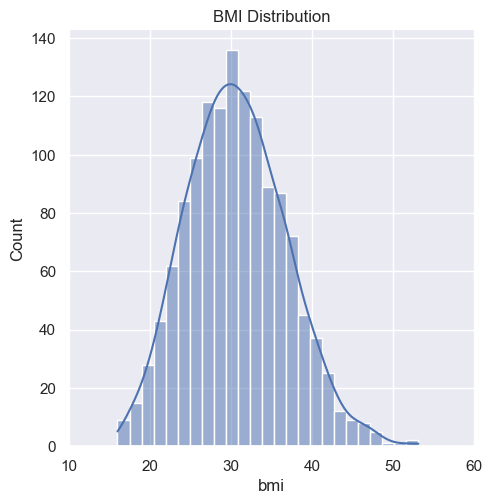

In [41]:
# BMI Distribution
plt.figure(figsize=(6, 6))
sns.displot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.xticks(range(10, int(insurance_dataset['bmi'].max()) + 10, 10))
plt.show()


Normal BMI Range --> 18.5 to 24.9

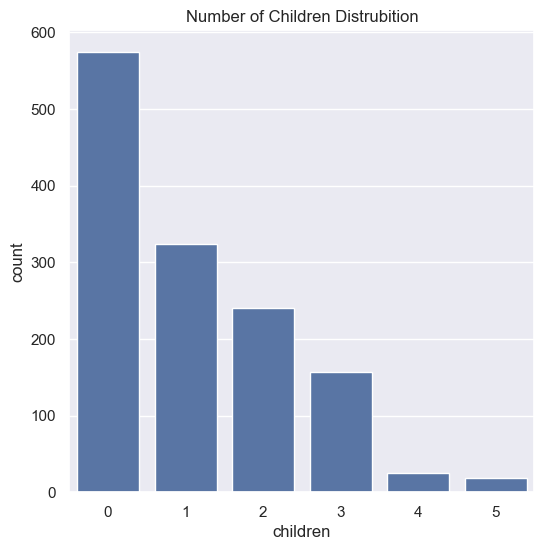

In [44]:
# Children Column
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Number of Children Distrubition')
plt.show()

In [45]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

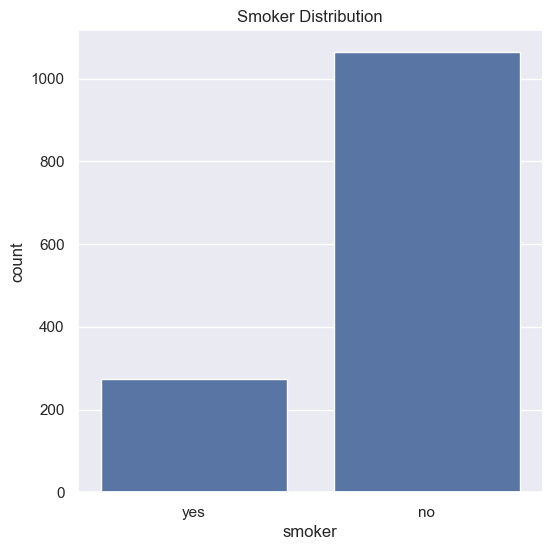

In [46]:
# Smoker Column
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()


In [49]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

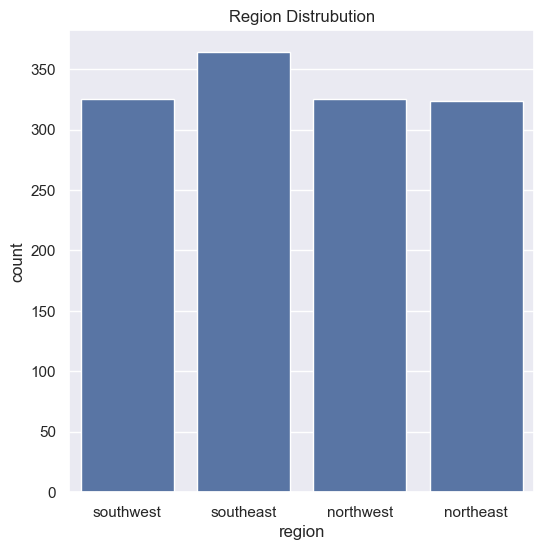

In [50]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distrubution')
plt.show()


In [51]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

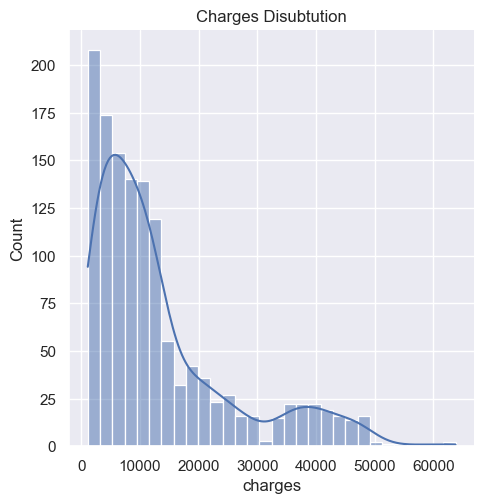

In [53]:
# Distribution of Charges
plt.figure(figsize=(6, 6))
sns.displot(insurance_dataset['charges'], kde=True)
plt.title('Charges Disubtution')
plt.show()

Data Pre-Processing

Encoding the Categorical Features

In [60]:
# Encoding the Sex Column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding the Smoker Column
insurance_dataset.replace({'smoker':{'yes': 0, 'no':1}}, inplace=True)
insurance_dataset = insurance_dataset.infer_objects()

# Encoding the Region Coluumn
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast': 2, 'northwest':3}}, inplace=True)
insurance_dataset = insurance_dataset.infer_objects()


Splitting the Features and Target

In [64]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

Splitting the data into Training Data & Testing Data

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training

Linear Regression Model

In [100]:
# Loading the Linear Regression Model
regressor = LinearRegression()

In [101]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [102]:
# Prediction of Training Data
training_data_prediction = regressor.predict(X_train)

In [106]:
# R squared value
r_squared_train = metrics.r2_score(Y_train, training_data_prediction)
print(f"The R squared value is {r_squared_train}")

The R squared value is 0.751505643411174


In [108]:
# Prediction of Testing Data
test_data_prediction = regressor.predict(X_test)

In [109]:
# R squared value
r_squared_test = metrics.r2_score(Y_test, test_data_prediction)
print(f"The R squared value is {r_squared_test}")

The R squared value is 0.7447273869684077


Building a Predictive System

In [115]:
input_data = (31,1,25.74,0,1,0) 

# changing input_data to a np array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

# actual is: 3756.6216 and predicted is: 3760

print(f"The insurance cost is USD {prediction[0]}")


The insurance cost is USD 3760.0805764960496


c:\Users\aarus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
